In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import ta
import matplotlib as mpl
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True) 
mpl.style.use('seaborn')
pd.set_option('display.max_columns', 1000)

In [3]:
df=pd.read_csv("aud_usd_h4_mapNmerged_.csv")
df.columns = df.columns.str.replace('.','_')

In [4]:
df.shape

(14028, 758)

In [5]:
df=df.dropna(how='all',axis=1)
df.shape

(14028, 756)

In [6]:
df.head()

start_time_local_            end_time_local_  bid_open  bid_high  \
0  2010-01-05 18:00:00+00:00  2010-01-05 22:00:00+00:00    0.9132    0.9153   
1  2010-01-05 22:00:00+00:00  2010-01-06 02:00:00+00:00    0.9123    0.9126   
2  2010-01-06 02:00:00+00:00  2010-01-06 06:00:00+00:00    0.9114    0.9138   
3  2010-01-06 06:00:00+00:00  2010-01-06 10:00:00+00:00    0.9134    0.9143   
4  2010-01-06 10:00:00+00:00  2010-01-06 14:00:00+00:00    0.9140    0.9151   

   bid_low  bid_close  PC2_AUD_H4  PC7_AUD_H4  PC14_AUD_H4  PC20_AUD_H4  \
0   0.9110     0.9124       -0.31        0.50         1.72          0.0   
1   0.9090     0.9117       -0.16       -0.03         1.64          0.0   
2   0.9102     0.9135        0.12        0.13         1.84          0.0   
3   0.9123     0.9142        0.27        0.14         1.76          0.0   
4   0.9097     0.9142        0.08       -0.01         2.13          0.0   

   PC50_AUD_H4  STDEV_AUD_H4_1p  STDEV_AUD_H4_2p  STDEV_AUD_H4_4p  \
0          0.0           0.0004           0.0012           0.0010   
1          0.0           0.0004           0.0006           0.0013   
2          0.0           0.0009           0.0007           0.0012   
3          0.0           0.0004           0.0011           0.0009   
4          0.0           0.0000           0.0003           0.0010   

   STDEV_AUD_H4_7p  STDEV_AUD_H4_10p  STDEV_AUD_H4_14p  STDEV_AUD_H4_20p  \
0           0.0020            0.0065            0.0076               0.0   
1           0.0011            0.0049            0.0073               0.0   
2           0.0011            0.0027            0.0070               0.0   
3           0.0011            0.0018            0.0065               0.0   
4           0.0011            0.0011            0.0059               0.0   

   CS_AUD_CAD_H4_7  correl_AUD_CAD_7p  CS_AUD_CAD_H4_10  correl_AUD_CAD_10p  \
0            0.706             -0.540               NaN                 NaN   
1            0.848             -0.546               NaN                 NaN   
2            0.894             -0.510               NaN                 NaN   
3            0.915             -0.466               NaN                 NaN   
4            0.932             -0.562               NaN                 NaN   

   CS_AUD_CAD_H4_20  correl_AUD_CAD_20p  CS_AUD_CHF_H4_7  correl_AUD_CHF_7p  \
0               NaN                 NaN            0.937             -0.538   
1               NaN                 NaN            0.878             -0.657   
2               NaN                 NaN            0.849             -0.627   
3               NaN                 NaN            0.787             -0.433   
4               NaN                 NaN            0.690             -0.481   

   CS_AUD_CHF_H4_10  correl_AUD_CHF_10p  CS_AUD_CHF_H4_20  correl_AUD_CHF_20p  \
0               NaN                 NaN               NaN                 NaN   
1               NaN                 NaN               NaN                 NaN   
2               NaN                 NaN               NaN                 NaN   
3               NaN                 NaN               NaN                 NaN   
4               NaN                 NaN               NaN                 NaN   

   CS_AUD_GBP_H4_7  correl_AUD_GBP_7p  CS_AUD_GBP_H4_10  correl_AUD_GBP_10p  \
0           -0.571             -0.495               NaN                 NaN   
1           -0.735              0.273               NaN                 NaN   
2           -0.727              0.409               NaN                 NaN   
3           -0.719              0.337               NaN                 NaN   
4           -0.644              0.421               NaN                 NaN   

   CS_AUD_GBP_H4_20  correl_AUD_GBP_20p  CS_AUD_JPY_H4_7  correl_AUD_JPY_7p  \
0               NaN                 NaN           -0.423             -0.628   
1               NaN                 NaN           -0.606             -0.307   
2               NaN                 NaN           -0.469        

In [7]:
list(df.columns)

['start_time_local_',
 'end_time_local_',
 'bid_open',
 'bid_high',
 'bid_low',
 'bid_close',
 'PC2_AUD_H4',
 'PC7_AUD_H4',
 'PC14_AUD_H4',
 'PC20_AUD_H4',
 'PC50_AUD_H4',
 'STDEV_AUD_H4_1p',
 'STDEV_AUD_H4_2p',
 'STDEV_AUD_H4_4p',
 'STDEV_AUD_H4_7p',
 'STDEV_AUD_H4_10p',
 'STDEV_AUD_H4_14p',
 'STDEV_AUD_H4_20p',
 'CS_AUD_CAD_H4_7',
 'correl_AUD_CAD_7p',
 'CS_AUD_CAD_H4_10',
 'correl_AUD_CAD_10p',
 'CS_AUD_CAD_H4_20',
 'correl_AUD_CAD_20p',
 'CS_AUD_CHF_H4_7',
 'correl_AUD_CHF_7p',
 'CS_AUD_CHF_H4_10',
 'correl_AUD_CHF_10p',
 'CS_AUD_CHF_H4_20',
 'correl_AUD_CHF_20p',
 'CS_AUD_GBP_H4_7',
 'correl_AUD_GBP_7p',
 'CS_AUD_GBP_H4_10',
 'correl_AUD_GBP_10p',
 'CS_AUD_GBP_H4_20',
 'correl_AUD_GBP_20p',
 'CS_AUD_JPY_H4_7',
 'correl_AUD_JPY_7p',
 'CS_AUD_JPY_H4_10',
 'correl_AUD_JPY_10p',
 'CS_AUD_JPY_H4_20',
 'correl_AUD_JPY_20p',
 'CS_EUR_AUD_H4_7',
 'correl_EUR_AUD_7p',
 'CS_EUR_AUD_H4_10',
 'correl_EUR_AUD_10p',
 'CS_EUR_AUD_H4_20',
 'correl_EUR_AUD_20p',
 'target1',
 'target2',
 'target3',

In [8]:
df_2=df[['start_time_local_h1_1',
 'end_time_local_h1_1',
 'open_h1_1',
 'high_h1_1',
 'low_h1_1',
 'close_h1_1',
 'PC1_AUD_H1_h1_1',
 'PC2_AUD_H1_h1_1',
 'PC3_AUD_H1_h1_1',
 'STDEV_AUD_H1_2p_h1_1',
 'STDEV_AUD_H1_3p_h1_1',
 'correl_AUD_CAD_2p_h1_1',
 'correl_AUD_CAD_3p_h1_1',
 'correl_AUD_JPY_2p_h1_1',
 'correl_AUD_JPY_3p_h1_1',
 'correl_AUD_GBP_2p_h1_1',
 'correl_AUD_GBP_3p_h1_1',
 'correl_AUD_EUR_2p_h1_1',
 'correl_AUD_EUR_3p_h1_1',
 'correl_AUD_CHF_2p_h1_1',
 'correl_AUD_CHF_3p_h1_1',
 'CS_AUD_CAD_H1_2_h1_1',
 'CS_AUD_CAD_H1_3_h1_1',
 'CS_AUD_JPY_H1_2_h1_1',
 'CS_AUD_JPY_H1_3_h1_1',
 'CS_AUD_GBP_H1_2_h1_1',
 'CS_AUD_GBP_H1_3_h1_1',
 'CS_AUD_EUR_H1_2_h1_1',
 'CS_AUD_EUR_H1_3_h1_1',
 'CS_AUD_CHF_H1_2_h1_1',
 'CS_AUD_CHF_H1_3_h1_1',
 'start_time_local_h1_2',
 'end_time_local_h1_2',
 'open_h1_2',
 'high_h1_2',
 'low_h1_2',
 'close_h1_2',
 'PC1_AUD_H1_h1_2',
 'PC2_AUD_H1_h1_2',
 'PC3_AUD_H1_h1_2',
 'STDEV_AUD_H1_2p_h1_2',
 'STDEV_AUD_H1_3p_h1_2',
 'correl_AUD_CAD_2p_h1_2',
 'correl_AUD_CAD_3p_h1_2',
 'correl_AUD_JPY_2p_h1_2',
 'correl_AUD_JPY_3p_h1_2',
 'correl_AUD_GBP_2p_h1_2',
 'correl_AUD_GBP_3p_h1_2',
 'correl_AUD_EUR_2p_h1_2',
 'correl_AUD_EUR_3p_h1_2',
 'correl_AUD_CHF_2p_h1_2',
 'correl_AUD_CHF_3p_h1_2',
 'CS_AUD_CAD_H1_2_h1_2',
 'CS_AUD_CAD_H1_3_h1_2',
 'CS_AUD_JPY_H1_2_h1_2',
 'CS_AUD_JPY_H1_3_h1_2',
 'CS_AUD_GBP_H1_2_h1_2',
 'CS_AUD_GBP_H1_3_h1_2',
 'CS_AUD_EUR_H1_2_h1_2',
 'CS_AUD_EUR_H1_3_h1_2',
 'CS_AUD_CHF_H1_2_h1_2',
 'CS_AUD_CHF_H1_3_h1_2',
 'start_time_local_h1_3',
 'end_time_local_h1_3',
 'open_h1_2_1',
 'high_h1_2_1',
 'low_h1_2_1',
 'close_h1_2_1',
 'PC1_AUD_H1_h1_2_1',
 'PC2_AUD_H1_h1_2_1',
 'PC3_AUD_H1_h1_2_1',
 'STDEV_AUD_H1_2p_h1_2_1',
 'STDEV_AUD_H1_3p_h1_2_1',
 'correl_AUD_CAD_2p_h1_2_1',
 'correl_AUD_CAD_3p_h1_2_1',
 'correl_AUD_JPY_2p_h1_2_1',
 'correl_AUD_JPY_3p_h1_2_1',
 'correl_AUD_GBP_2p_h1_2_1',
 'correl_AUD_GBP_3p_h1_2_1',
 'correl_AUD_EUR_2p_h1_2_1',
 'correl_AUD_EUR_3p_h1_2_1',
 'correl_AUD_CHF_2p_h1_2_1',
 'correl_AUD_CHF_3p_h1_2_1',
 'CS_AUD_CAD_H1_2_h1_2_1',
 'CS_AUD_CAD_H1_3_h1_2_1',
 'CS_AUD_JPY_H1_2_h1_2_1',
 'CS_AUD_JPY_H1_3_h1_2_1',
 'CS_AUD_GBP_H1_2_h1_2_1',
 'CS_AUD_GBP_H1_3_h1_2_1',
 'CS_AUD_EUR_H1_2_h1_2_1',
 'CS_AUD_EUR_H1_3_h1_2_1',
 'CS_AUD_CHF_H1_2_h1_2_1',
 'CS_AUD_CHF_H1_3_h1_2_1',
 'start_time_local_h1_4',
 'end_time_local_h1_4',
 'open_h1_4',
 'high_h1_4',
 'low_h1_4',
 'close_h1_4',
 'PC1_AUD_H1_h1_4',
 'PC2_AUD_H1_h1_4',
 'PC3_AUD_H1_h1_4',
 'STDEV_AUD_H1_2p_h1_4',
 'STDEV_AUD_H1_3p_h1_4',
 'correl_AUD_CAD_2p_h1_4',
 'correl_AUD_CAD_3p_h1_4',
 'correl_AUD_JPY_2p_h1_4',
 'correl_AUD_JPY_3p_h1_4',
 'correl_AUD_GBP_2p_h1_4',
 'correl_AUD_GBP_3p_h1_4',
 'correl_AUD_EUR_2p_h1_4',
 'correl_AUD_EUR_3p_h1_4',
 'correl_AUD_CHF_2p_h1_4',
 'correl_AUD_CHF_3p_h1_4',
 'CS_AUD_CAD_H1_2_h1_4',
 'CS_AUD_CAD_H1_3_h1_4',
 'CS_AUD_JPY_H1_2_h1_4',
 'CS_AUD_JPY_H1_3_h1_4',
 'CS_AUD_GBP_H1_2_h1_4',
 'CS_AUD_GBP_H1_3_h1_4',
 'CS_AUD_EUR_H1_2_h1_4',
 'CS_AUD_EUR_H1_3_h1_4',
 'CS_AUD_CHF_H1_2_h1_4',
 'CS_AUD_CHF_H1_3_h1_4',
 'start_time_local_h1_5',
 'end_time_local_h1_5',
 'open_h1_5',
 'high_h1_5',
 'low_h1_5',
 'close_h1_5',
 'PC1_AUD_H1_h1_5',
 'PC2_AUD_H1_h1_5',
 'PC3_AUD_H1_h1_5',
 'STDEV_AUD_H1_2p_h1_5',
 'STDEV_AUD_H1_3p_h1_5',
 'correl_AUD_CAD_2p_h1_5',
 'correl_AUD_CAD_3p_h1_5',
 'correl_AUD_JPY_2p_h1_5',
 'correl_AUD_JPY_3p_h1_5',
 'correl_AUD_GBP_2p_h1_5',
 'correl_AUD_GBP_3p_h1_5',
 'correl_AUD_EUR_2p_h1_5',
 'correl_AUD_EUR_3p_h1_5',
 'correl_AUD_CHF_2p_h1_5',
 'correl_AUD_CHF_3p_h1_5',
 'CS_AUD_CAD_H1_2_h1_5',
 'CS_AUD_CAD_H1_3_h1_5',
 'CS_AUD_JPY_H1_2_h1_5',
 'CS_AUD_JPY_H1_3_h1_5',
 'CS_AUD_GBP_H1_2_h1_5',
 'CS_AUD_GBP_H1_3_h1_5',
 'CS_AUD_EUR_H1_2_h1_5',
 'CS_AUD_EUR_H1_3_h1_5',
 'CS_AUD_CHF_H1_2_h1_5',
 'CS_AUD_CHF_H1_3_h1_5',
]]

In [9]:
df_2.head()

start_time_local_h1_1        end_time_local_h1_1  open_h1_1  high_h1_1  \
0  2010-01-05 18:00:00+00:00  2010-01-05 19:00:00+00:00     0.9132     0.9139   
1  2010-01-05 22:00:00+00:00  2010-01-05 23:00:00+00:00     0.9123     0.9126   
2  2010-01-06 02:00:00+00:00  2010-01-06 03:00:00+00:00     0.9114     0.9120   
3  2010-01-06 06:00:00+00:00  2010-01-06 07:00:00+00:00     0.9134     0.9138   
4  2010-01-06 10:00:00+00:00  2010-01-06 11:00:00+00:00     0.9140     0.9148   

   low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  \
0    0.9110      0.9128        -0.000438        -0.002840        -0.001859   
1    0.9100      0.9106        -0.001973        -0.003938        -0.004047   
2    0.9102      0.9116        -0.000110         0.000110         0.000219   
3    0.9123      0.9133        -0.000219         0.001425         0.002085   
4    0.9107      0.9119        -0.002516        -0.001752        -0.001752   

   STDEV_AUD_H1_2p_h1_1  STDEV_AUD_H1_3p_h1_1 correl_AUD_CAD_2p_h1_1  \
0              0.000283              0.001400           -1.000000139   
1              0.001273              0.001800           -1.000000001   
2              0.000071              0.000100            0.999999461   
3              0.000141              0.000814           -1.000000061   
4              0.001626              0.001179           -1.000000001   

  correl_AUD_CAD_3p_h1_1 correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1  \
0           -0.995340784            0.999999996                0.834074   
1           -0.952216581           -1.000000014               -0.944911   
2           -0.499999858           -1.000000154                0.427121   
3           -0.999651616                 #NAME?                0.992434   
4           -0.924025127           -1.000000005               -0.907348   

  correl_AUD_GBP_2p_h1_1 correl_AUD_GBP_3p_h1_1 correl_AUD_EUR_2p_h1_1  \
0            -0.99999999           -0.618589578            0.999999997   
1            1.000000001            0.938652204                      1   
2            0.999999992           -0.569494863            0.999999949   
3            1.000000016            0.995093889            0.999999989   
4                     -1           -0.208948746                      1   

  correl_AUD_EUR_3p_h1_1 correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1  \
0               0.870159           -1.000000003               -0.902906   
1               0.973684           -1.000000001               -0.886357   
2              -0.327327           -0.010969815                0.866026   
3               0.931231           -1.000000038               -0.999076   
4               0.948821                     -1               -0.967150   

  CS_AUD_CAD_H1_2_h1_1 CS_AUD_CAD_H1_3_h1_1 CS_AUD_JPY_H1_2_h1_1  \
0                    1          -0.51864974                   -1   
1             4.26E-06          0.983621219            -6.53E-06   
2             2.32E-07          0.734060393                   -1   
3                    1          0.968290838                    1   
4                    1          0.976170858                    1   

  CS_AUD_JPY_H1_3_h1_1 CS_AUD_GBP_H1_2_h1_1 CS_AUD_GBP_H1_3_h1_1  \
0          0.999765903                   -1         -0.992227519   
1         -0.394944771             4.37E-06          0.394862866   
2           0.99987665                    1          0.999383913   
3          0.787925555                    1          0.399872049   
4         -0.998090146                   -1          0.632776504   

  CS_AUD_EUR_H1_2_h1_1 CS_AUD_EUR_H1_3_h1_1 CS_AUD_CHF_H1_2_h1_1  \
0                   -1          0.818461576                   -1   
1             6.52E-06          0.980624612             4.30E-06   
2                   -1         -0.603173131                    1   
3                    1          0.984598109                    1   
4                    1           0.96494589                    1   

  CS_AUD_CHF_H1_3_h1_1      start_time_local

In [10]:
df_old=pd.read_csv("forex_dataframe_new.csv")

In [11]:
df_old.head()

time_local start_time_local  end_time_local  bid_open  \
0  2010-01-05 18:00:00+00:00   1/5/2010 18:00  1/5/2010 22:00    0.9132   
1  2010-01-05 22:00:00+00:00   1/5/2010 22:00   1/6/2010 2:00    0.9123   
2  2010-01-06 02:00:00+00:00    1/6/2010 2:00   1/6/2010 6:00    0.9114   
3  2010-01-06 06:00:00+00:00    1/6/2010 6:00  1/6/2010 10:00    0.9134   
4  2010-01-06 10:00:00+00:00   1/6/2010 10:00  1/6/2010 14:00    0.9140   

   bid_high  bid_low  bid_close  PC2_AUD_H4  PC7_AUD_H4  PC14_AUD_H4  \
0    0.9153   0.9110     0.9124       -0.31        0.50         1.72   
1    0.9126   0.9090     0.9117       -0.16       -0.03         1.64   
2    0.9138   0.9102     0.9135        0.12        0.13         1.84   
3    0.9143   0.9123     0.9142        0.27        0.14         1.76   
4    0.9151   0.9097     0.9142        0.08       -0.01         2.13   

   PC20_AUD_H4  PC50_AUD_H4  STDEV_AUD_H4_1p  STDEV_AUD_H4_2p  \
0          0.0          0.0           0.0004           0.0012   
1          0.0          0.0           0.0004           0.0006   
2          0.0          0.0           0.0009           0.0007   
3          0.0          0.0           0.0004           0.0011   
4          0.0          0.0           0.0000           0.0003   

   STDEV_AUD_H4_4p  STDEV_AUD_H4_7p  STDEV_AUD_H4_10p  STDEV_AUD_H4_14p  \
0           0.0010           0.0020            0.0065            0.0076   
1           0.0013           0.0011            0.0049            0.0073   
2           0.0012           0.0011            0.0027            0.0070   
3           0.0009           0.0011            0.0018            0.0065   
4           0.0010           0.0011            0.0011            0.0059   

   STDEV_AUD_H4_20p  CS_AUD_CAD_H4_7  correl_AUD_CAD_7p  CS_AUD_CAD_H4_10  \
0               0.0            0.706             -0.540               NaN   
1               0.0            0.848             -0.546               NaN   
2               0.0            0.894             -0.510               NaN   
3               0.0            0.915             -0.466               NaN   
4               0.0            0.932             -0.562               NaN   

   correl_AUD_CAD_10p  CS_AUD_CAD_H4_20  correl_AUD_CAD_20p  CS_AUD_CHF_H4_7  \
0                 NaN               NaN                 NaN            0.937   
1                 NaN               NaN                 NaN            0.878   
2                 NaN               NaN                 NaN            0.849   
3                 NaN               NaN                 NaN            0.787   
4                 NaN               NaN                 NaN            0.690   

   correl_AUD_CHF_7p  CS_AUD_CHF_H4_10  correl_AUD_CHF_10p  CS_AUD_CHF_H4_20  \
0             -0.538               NaN                 NaN               NaN   
1             -0.657               NaN                 NaN               NaN   
2             -0.627               NaN                 NaN               NaN   
3             -0.433               NaN                 NaN               NaN   
4             -0.481               NaN                 NaN               NaN   

   correl_AUD_CHF_20p  CS_AUD_GBP_H4_7  correl_AUD_GBP_7p  CS_AUD_GBP_H4_10  \
0                 NaN           -0.571             -0.495               NaN   
1                 NaN           -0.735              0.273               NaN   
2                 NaN           -0.727              0.409               NaN   
3                 NaN           -0.719              0.337               NaN   
4                 NaN           -0.644              0.421               NaN   

   correl_AUD_GBP_10p  CS_AUD_GBP_H4_20  correl_AUD_GBP_20p  CS_AUD_JPY_H4_7  \
0                 NaN               NaN                 NaN           -0.423   
1                 NaN               NaN                 NaN           -0.606   
2                 NaN               NaN                 NaN           -0.469   
3                 NaN               NaN                 NaN            0

In [12]:
df_merged=pd.merge(df_2, df_old,how='inner',right_on='time_local',left_on='start_time_local_h1_1')

In [13]:
[df_2.shape,df_old.shape]

[(14028, 155), (15269, 542)]

In [14]:
df_merged.shape

(14028, 697)

In [15]:
macro_economic_data=pd.read_excel(r"2007 to Jan 2019 Macro Economic Data.xlsx")
macro_economic_data_AUD=macro_economic_data[(macro_economic_data['Currency']=='AUD') ]
macro_economic_data_AUD['DateTime (GMT)']=macro_economic_data_AUD['DateTime (GMT)']+timedelta(hours=4)
macro_economic_data_AUD['Date']=pd.DatetimeIndex(macro_economic_data_AUD['DateTime (GMT)']).date
#macro_economic_data_AUD['PC_macro_economic_ind'] = ( macro_economic_data_AUD['Actual'] - macro_economic_data_AUD['Previous'] ) / macro_economic_data_AUD['Previous'] 

In [16]:
macro_economic_data_AUD['hour']=pd.DatetimeIndex(macro_economic_data_AUD['DateTime (GMT)']).hour

In [17]:
def hour_extract(hour):
        if(hour<=2):
            return 2
        elif (hour>2 and hour<=6):
            return 6
        elif (hour>6 and hour<=10):
            return 10
        elif (hour>10 and hour<=14):
            return 14
        elif (hour>14 and hour<=18):
            return 18
        elif (hour>18 and hour<=22):
            return 22
        else:
            return 2
            

macro_economic_data_AUD['H4_hour']=macro_economic_data_AUD['hour'].apply(hour_extract)

In [18]:
macro_economic_data_AUD['PC_macro_economic_ind'] = ( macro_economic_data_AUD['Actual'] - macro_economic_data_AUD['Previous'] ) / macro_economic_data_AUD['Previous']  
macro_mean_AUD_Summary=macro_economic_data_AUD.groupby(['Date','H4_hour','Name'])['PC_macro_economic_ind','Volatility'].mean().reset_index()

In [19]:
macro_mean_AUD_Summary.fillna(0,inplace=True)
macro_mean_AUD_Summary['Datetime']=pd.to_datetime(macro_mean_AUD_Summary.Date) + macro_mean_AUD_Summary.H4_hour.astype('timedelta64[h]')

In [20]:
df1=macro_mean_AUD_Summary.pivot(index='Datetime', columns='Name', values='PC_macro_economic_ind').reset_index()
df1.columns = [str(col) + '_PC' for col in df1.columns]
df1.rename(columns={'Datetime_PC':'Datetime'}, inplace=True)
df1.head()


df2=macro_mean_AUD_Summary.pivot(index='Datetime', columns='Name', values='Volatility').reset_index()
df2.columns = [str(col) + '_VOL' for col in df2.columns]
df2.rename(columns={'Datetime_VOL':'Datetime'}, inplace=True)
df2.head()


macro_mean_AUD_Summary_new=pd.merge(df1,df2, how='inner', on='Datetime')
macro_mean_AUD_Summary_new.head()

Datetime  ANZ Job Advertisements_PC  ANZAC Day_PC  \
0 2007-01-22 06:00:00                        NaN           NaN   
1 2007-02-08 06:00:00                        NaN           NaN   
2 2007-02-21 06:00:00                        NaN           NaN   
3 2007-03-15 06:00:00                        NaN           NaN   
4 2007-04-03 06:00:00                        NaN           NaN   

   AiG Performance of Construction Index_PC  AiG Performance of Mfg Index_PC  \
0                                       NaN                              NaN   
1                                       NaN                              NaN   
2                                       NaN                              NaN   
3                                       NaN                              NaN   
4                                       NaN                              NaN   

   AiG Performance of Services Index_PC  Australia Day_PC  \
0                                   NaN               NaN   
1                                   NaN               NaN   
2                                   NaN               NaN   
3                                   NaN               NaN   
4                                   NaN               NaN   

   Australia Day (Observed)_PC  Bank Holiday_PC  Boxing Day _PC  \
0                          NaN              NaN             NaN   
1                          NaN              NaN             NaN   
2                          NaN              NaN             NaN   
3                          NaN              NaN             NaN   
4                          NaN              NaN             NaN   

   Budget Release_PC  Building Permits (MoM)_PC  Building Permits (YoY)_PC  \
0                NaN                        NaN                        NaN   
1                NaN                        NaN                        NaN   
2                NaN                        NaN                        NaN   
3                NaN                        NaN                        NaN   
4                NaN                        NaN                        NaN   

   CFTC AUD NC net positions_PC  Christmas Day_PC  \
0                           NaN               NaN   
1                           NaN               NaN   
2                           NaN               NaN   
3                           NaN               NaN   
4                           NaN               NaN   

   Christmas Day (observed)_PC  Company Gross Operating Profits (QoQ)_PC  \
0                          NaN                                       NaN   
1                          NaN                                       NaN   
2                          NaN                                       NaN   
3                          NaN                                       NaN   
4                          NaN                                       NaN   

   Construction Work Done_PC  Consumer Inflation Expectation_PC  \
0                        NaN                                NaN   
1                        NaN                                NaN   
2                        NaN                                NaN   
3                        NaN                                NaN   
4                        NaN                                NaN   

   Consumer Price Index (QoQ)_PC  Consumer Price Index (YoY)_PC  \
0                            NaN                            NaN   
1                            NaN                            NaN   
2                            NaN                            NaN   
3                            NaN                            NaN   
4                            NaN                            NaN   

   Current Account Balance_PC  Daylight Saving Time_PC  \
0                         NaN                      NaN   
1                         NaN                      NaN   
2                         NaN                      NaN   
3                         NaN                      NaN   
4                       

In [21]:
macro_mean_AUD_Summary_new.fillna(0,inplace=True)

In [22]:
df_merged.head()

start_time_local_h1_1        end_time_local_h1_1  open_h1_1  high_h1_1  \
0  2010-01-05 18:00:00+00:00  2010-01-05 19:00:00+00:00     0.9132     0.9139   
1  2010-01-05 22:00:00+00:00  2010-01-05 23:00:00+00:00     0.9123     0.9126   
2  2010-01-06 02:00:00+00:00  2010-01-06 03:00:00+00:00     0.9114     0.9120   
3  2010-01-06 06:00:00+00:00  2010-01-06 07:00:00+00:00     0.9134     0.9138   
4  2010-01-06 10:00:00+00:00  2010-01-06 11:00:00+00:00     0.9140     0.9148   

   low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  \
0    0.9110      0.9128        -0.000438        -0.002840        -0.001859   
1    0.9100      0.9106        -0.001973        -0.003938        -0.004047   
2    0.9102      0.9116        -0.000110         0.000110         0.000219   
3    0.9123      0.9133        -0.000219         0.001425         0.002085   
4    0.9107      0.9119        -0.002516        -0.001752        -0.001752   

   STDEV_AUD_H1_2p_h1_1  STDEV_AUD_H1_3p_h1_1 correl_AUD_CAD_2p_h1_1  \
0              0.000283              0.001400           -1.000000139   
1              0.001273              0.001800           -1.000000001   
2              0.000071              0.000100            0.999999461   
3              0.000141              0.000814           -1.000000061   
4              0.001626              0.001179           -1.000000001   

  correl_AUD_CAD_3p_h1_1 correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1  \
0           -0.995340784            0.999999996                0.834074   
1           -0.952216581           -1.000000014               -0.944911   
2           -0.499999858           -1.000000154                0.427121   
3           -0.999651616                 #NAME?                0.992434   
4           -0.924025127           -1.000000005               -0.907348   

  correl_AUD_GBP_2p_h1_1 correl_AUD_GBP_3p_h1_1 correl_AUD_EUR_2p_h1_1  \
0            -0.99999999           -0.618589578            0.999999997   
1            1.000000001            0.938652204                      1   
2            0.999999992           -0.569494863            0.999999949   
3            1.000000016            0.995093889            0.999999989   
4                     -1           -0.208948746                      1   

  correl_AUD_EUR_3p_h1_1 correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1  \
0               0.870159           -1.000000003               -0.902906   
1               0.973684           -1.000000001               -0.886357   
2              -0.327327           -0.010969815                0.866026   
3               0.931231           -1.000000038               -0.999076   
4               0.948821                     -1               -0.967150   

  CS_AUD_CAD_H1_2_h1_1 CS_AUD_CAD_H1_3_h1_1 CS_AUD_JPY_H1_2_h1_1  \
0                    1          -0.51864974                   -1   
1             4.26E-06          0.983621219            -6.53E-06   
2             2.32E-07          0.734060393                   -1   
3                    1          0.968290838                    1   
4                    1          0.976170858                    1   

  CS_AUD_JPY_H1_3_h1_1 CS_AUD_GBP_H1_2_h1_1 CS_AUD_GBP_H1_3_h1_1  \
0          0.999765903                   -1         -0.992227519   
1         -0.394944771             4.37E-06          0.394862866   
2           0.99987665                    1          0.999383913   
3          0.787925555                    1          0.399872049   
4         -0.998090146                   -1          0.632776504   

  CS_AUD_EUR_H1_2_h1_1 CS_AUD_EUR_H1_3_h1_1 CS_AUD_CHF_H1_2_h1_1  \
0                   -1          0.818461576                   -1   
1             6.52E-06          0.980624612             4.30E-06   
2                   -1         -0.603173131                    1   
3                    1          0.984598109                    1   
4                    1           0.96494589                    1   

  CS_AUD_CHF_H1_3_h1_1      start_time_local

In [23]:
df_merged['start_time_local_h1_1']=pd.DatetimeIndex(df_merged['start_time_local_h1_1'])
macro_mean_AUD_Summary_new['Datetime']=pd.DatetimeIndex(macro_mean_AUD_Summary_new['Datetime'])
df_merged.set_index('start_time_local_h1_1')
macro_mean_AUD_Summary_new.set_index('Datetime')

df=pd.merge(df_merged,macro_mean_AUD_Summary_new,how='left',right_index=True,left_index=True)
#df=pd.merge(df_merged,macro_mean_AUD_Summary_new,how='left',right_on='Datetime',left_on='start_time_local_h1_1')

In [24]:

df.head()

start_time_local_h1_1        end_time_local_h1_1  open_h1_1  high_h1_1  \
0 2010-01-05 18:00:00+00:00  2010-01-05 19:00:00+00:00     0.9132     0.9139   
1 2010-01-05 22:00:00+00:00  2010-01-05 23:00:00+00:00     0.9123     0.9126   
2 2010-01-06 02:00:00+00:00  2010-01-06 03:00:00+00:00     0.9114     0.9120   
3 2010-01-06 06:00:00+00:00  2010-01-06 07:00:00+00:00     0.9134     0.9138   
4 2010-01-06 10:00:00+00:00  2010-01-06 11:00:00+00:00     0.9140     0.9148   

   low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  \
0    0.9110      0.9128        -0.000438        -0.002840        -0.001859   
1    0.9100      0.9106        -0.001973        -0.003938        -0.004047   
2    0.9102      0.9116        -0.000110         0.000110         0.000219   
3    0.9123      0.9133        -0.000219         0.001425         0.002085   
4    0.9107      0.9119        -0.002516        -0.001752        -0.001752   

   STDEV_AUD_H1_2p_h1_1  STDEV_AUD_H1_3p_h1_1 correl_AUD_CAD_2p_h1_1  \
0              0.000283              0.001400           -1.000000139   
1              0.001273              0.001800           -1.000000001   
2              0.000071              0.000100            0.999999461   
3              0.000141              0.000814           -1.000000061   
4              0.001626              0.001179           -1.000000001   

  correl_AUD_CAD_3p_h1_1 correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1  \
0           -0.995340784            0.999999996                0.834074   
1           -0.952216581           -1.000000014               -0.944911   
2           -0.499999858           -1.000000154                0.427121   
3           -0.999651616                 #NAME?                0.992434   
4           -0.924025127           -1.000000005               -0.907348   

  correl_AUD_GBP_2p_h1_1 correl_AUD_GBP_3p_h1_1 correl_AUD_EUR_2p_h1_1  \
0            -0.99999999           -0.618589578            0.999999997   
1            1.000000001            0.938652204                      1   
2            0.999999992           -0.569494863            0.999999949   
3            1.000000016            0.995093889            0.999999989   
4                     -1           -0.208948746                      1   

  correl_AUD_EUR_3p_h1_1 correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1  \
0               0.870159           -1.000000003               -0.902906   
1               0.973684           -1.000000001               -0.886357   
2              -0.327327           -0.010969815                0.866026   
3               0.931231           -1.000000038               -0.999076   
4               0.948821                     -1               -0.967150   

  CS_AUD_CAD_H1_2_h1_1 CS_AUD_CAD_H1_3_h1_1 CS_AUD_JPY_H1_2_h1_1  \
0                    1          -0.51864974                   -1   
1             4.26E-06          0.983621219            -6.53E-06   
2             2.32E-07          0.734060393                   -1   
3                    1          0.968290838                    1   
4                    1          0.976170858                    1   

  CS_AUD_JPY_H1_3_h1_1 CS_AUD_GBP_H1_2_h1_1 CS_AUD_GBP_H1_3_h1_1  \
0          0.999765903                   -1         -0.992227519   
1         -0.394944771             4.37E-06          0.394862866   
2           0.99987665                    1          0.999383913   
3          0.787925555                    1          0.399872049   
4         -0.998090146                   -1          0.632776504   

  CS_AUD_EUR_H1_2_h1_1 CS_AUD_EUR_H1_3_h1_1 CS_AUD_CHF_H1_2_h1_1  \
0                   -1          0.818461576                   -1   
1             6.52E-06          0.980624612             4.30E-06   
2                   -1         -0.603173131                    1   
3                    1          0.984598109                    1   
4                    1           0.96494589                    1   

  CS_AUD_CHF_H1_3_h1_1      start_time_local_h1_2

In [25]:
df['year']=pd.DatetimeIndex(df['start_time_local']).year
df['month']=pd.DatetimeIndex(df['start_time_local']).month
df['day']=pd.DatetimeIndex(df['start_time_local']).day
df['hour']=pd.DatetimeIndex(df['start_time_local']).hour
df['dayofweek']=pd.DatetimeIndex(df['start_time_local']).dayofweek

In [26]:
col_drop= df.filter(regex='time').columns

In [27]:
col_drop

Index(['start_time_local_h1_1', 'end_time_local_h1_1', 'start_time_local_h1_2',
       'end_time_local_h1_2', 'start_time_local_h1_3', 'end_time_local_h1_3',
       'start_time_local_h1_4', 'end_time_local_h1_4', 'start_time_local_h1_5',
       'end_time_local_h1_5', 'time_local', 'start_time_local',
       'end_time_local', 'Datetime', 'Fulltime employment_PC',
       'Part-time employment_PC', 'Fulltime employment_VOL',
       'Part-time employment_VOL'],
      dtype='object')

In [28]:
X=df.drop([
'start_time_local_h1_1', 'end_time_local_h1_1', 'start_time_local_h1_2',
       'end_time_local_h1_2', 'start_time_local_h1_3', 'end_time_local_h1_3',
       'start_time_local_h1_4', 'end_time_local_h1_4', 'start_time_local_h1_5',
       'end_time_local_h1_5', 'time_local', 'start_time_local',
       'end_time_local', 'Datetime'
],axis=1)

In [29]:
X.head()

open_h1_1  high_h1_1  low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  \
0     0.9132     0.9139    0.9110      0.9128        -0.000438   
1     0.9123     0.9126    0.9100      0.9106        -0.001973   
2     0.9114     0.9120    0.9102      0.9116        -0.000110   
3     0.9134     0.9138    0.9123      0.9133        -0.000219   
4     0.9140     0.9148    0.9107      0.9119        -0.002516   

   PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  STDEV_AUD_H1_2p_h1_1  \
0        -0.002840        -0.001859              0.000283   
1        -0.003938        -0.004047              0.001273   
2         0.000110         0.000219              0.000071   
3         0.001425         0.002085              0.000141   
4        -0.001752        -0.001752              0.001626   

   STDEV_AUD_H1_3p_h1_1 correl_AUD_CAD_2p_h1_1 correl_AUD_CAD_3p_h1_1  \
0              0.001400           -1.000000139           -0.995340784   
1              0.001800           -1.000000001           -0.952216581   
2              0.000100            0.999999461           -0.499999858   
3              0.000814           -1.000000061           -0.999651616   
4              0.001179           -1.000000001           -0.924025127   

  correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1 correl_AUD_GBP_2p_h1_1  \
0            0.999999996                0.834074            -0.99999999   
1           -1.000000014               -0.944911            1.000000001   
2           -1.000000154                0.427121            0.999999992   
3                 #NAME?                0.992434            1.000000016   
4           -1.000000005               -0.907348                     -1   

  correl_AUD_GBP_3p_h1_1 correl_AUD_EUR_2p_h1_1 correl_AUD_EUR_3p_h1_1  \
0           -0.618589578            0.999999997               0.870159   
1            0.938652204                      1               0.973684   
2           -0.569494863            0.999999949              -0.327327   
3            0.995093889            0.999999989               0.931231   
4           -0.208948746                      1               0.948821   

  correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1 CS_AUD_CAD_H1_2_h1_1  \
0           -1.000000003               -0.902906                    1   
1           -1.000000001               -0.886357             4.26E-06   
2           -0.010969815                0.866026             2.32E-07   
3           -1.000000038               -0.999076                    1   
4                     -1               -0.967150                    1   

  CS_AUD_CAD_H1_3_h1_1 CS_AUD_JPY_H1_2_h1_1 CS_AUD_JPY_H1_3_h1_1  \
0          -0.51864974                   -1          0.999765903   
1          0.983621219            -6.53E-06         -0.394944771   
2          0.734060393                   -1           0.99987665   
3          0.968290838                    1          0.787925555   
4          0.976170858                    1         -0.998090146   

  CS_AUD_GBP_H1_2_h1_1 CS_AUD_GBP_H1_3_h1_1 CS_AUD_EUR_H1_2_h1_1  \
0                   -1         -0.992227519                   -1   
1             4.37E-06          0.394862866             6.52E-06   
2                    1          0.999383913                   -1   
3                    1          0.399872049                    1   
4                   -1          0.632776504                    1   

  CS_AUD_EUR_H1_3_h1_1 CS_AUD_CHF_H1_2_h1_1 CS_AUD_CHF_H1_3_h1_1  open_h1_2  \
0          0.818461576                   -1             0.928103     0.9129   
1          0.980624612             4.30E-06             0.992686     0.9106   
2         -0.603173131                    1             0.999145     0.9116   
3          0.984598109                    1             0.888852     0.9133   
4           0.96494589                    1             0.574837     0.9119   

   high_h1_2  low_h1_2  close_h1_2  PC1_AUD_H1_h1_2  PC2_AUD_H1_h1_2  \
0     0.9144    0.9120      0.9143         0.001643         0.001205   
1     0.9115    0.9090      

<Figure size 720x720 with 0 Axes>

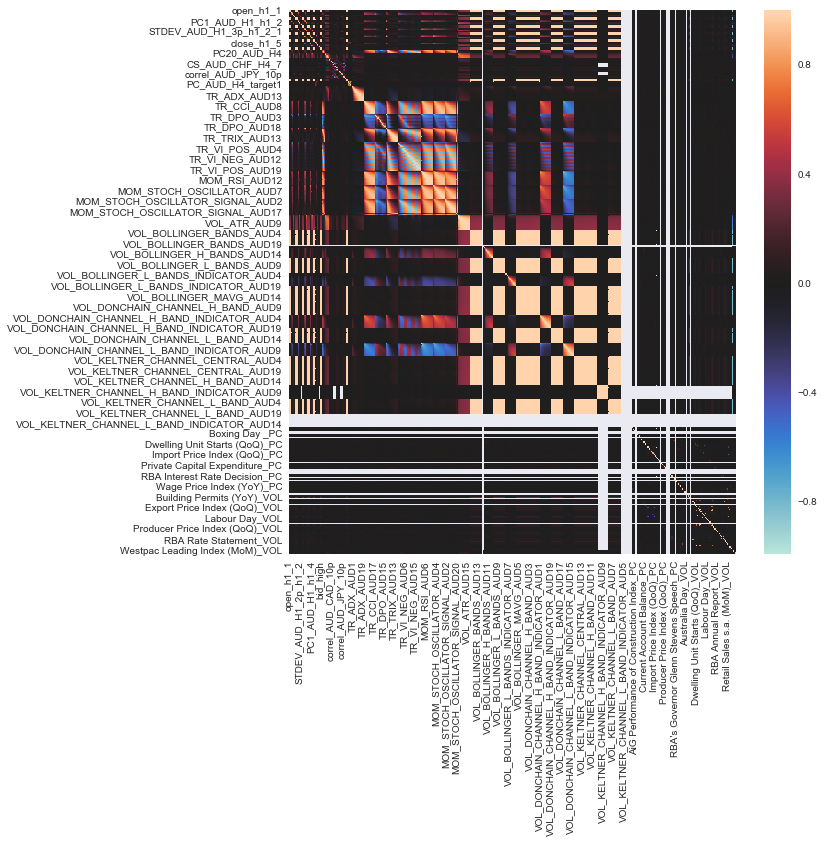

In [30]:
import seaborn as sns
plt.figure(figsize=(10,10))
#sns.heatmap(df_final.corr(),center=0,annot=True)

corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),center=0)

In [31]:
X=X.fillna(0)

In [32]:
df_temp=X.select_dtypes(include=['object'])

In [33]:
obj=df_temp.loc[:, df_temp.dtypes =='object']
for col in obj:
    obj[col] = pd.to_numeric(obj[col], errors='coerce')
df_temp[obj.columns]=obj

In [34]:
df_temp=df_temp.replace([np.inf, -np.inf], np.nan)
df_temp=df_temp.fillna(0)
X[df_temp.columns]=df_temp

In [35]:
X=X[X.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)]

In [36]:
X.head()

open_h1_1  high_h1_1  low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  \
0     0.9132     0.9139    0.9110      0.9128        -0.000438   
1     0.9123     0.9126    0.9100      0.9106        -0.001973   
2     0.9114     0.9120    0.9102      0.9116        -0.000110   
3     0.9134     0.9138    0.9123      0.9133        -0.000219   
4     0.9140     0.9148    0.9107      0.9119        -0.002516   

   PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  STDEV_AUD_H1_2p_h1_1  \
0        -0.002840        -0.001859              0.000283   
1        -0.003938        -0.004047              0.001273   
2         0.000110         0.000219              0.000071   
3         0.001425         0.002085              0.000141   
4        -0.001752        -0.001752              0.001626   

   STDEV_AUD_H1_3p_h1_1  correl_AUD_CAD_2p_h1_1  correl_AUD_CAD_3p_h1_1  \
0              0.001400               -1.000000               -0.995341   
1              0.001800               -1.000000               -0.952217   
2              0.000100                0.999999               -0.500000   
3              0.000814               -1.000000               -0.999652   
4              0.001179               -1.000000               -0.924025   

   correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1  correl_AUD_GBP_2p_h1_1  \
0                     1.0                0.834074                    -1.0   
1                    -1.0               -0.944911                     1.0   
2                    -1.0                0.427121                     1.0   
3                     0.0                0.992434                     1.0   
4                    -1.0               -0.907348                    -1.0   

   correl_AUD_GBP_3p_h1_1  correl_AUD_EUR_2p_h1_1  correl_AUD_EUR_3p_h1_1  \
0               -0.618590                     1.0                0.870159   
1                0.938652                     1.0                0.973684   
2               -0.569495                     1.0               -0.327327   
3                0.995094                     1.0                0.931231   
4               -0.208949                     1.0                0.948821   

   correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1  CS_AUD_CAD_H1_2_h1_1  \
0                -1.00000               -0.902906          1.000000e+00   
1                -1.00000               -0.886357          4.260000e-06   
2                -0.01097                0.866026          2.320000e-07   
3                -1.00000               -0.999076          1.000000e+00   
4                -1.00000               -0.967150          1.000000e+00   

   CS_AUD_CAD_H1_3_h1_1  CS_AUD_JPY_H1_2_h1_1  CS_AUD_JPY_H1_3_h1_1  \
0             -0.518650             -1.000000              0.999766   
1              0.983621             -0.000007             -0.394945   
2              0.734060             -1.000000              0.999877   
3              0.968291              1.000000              0.787926   
4              0.976171              1.000000             -0.998090   

   CS_AUD_GBP_H1_2_h1_1  CS_AUD_GBP_H1_3_h1_1  CS_AUD_EUR_H1_2_h1_1  \
0             -1.000000             -0.992228             -1.000000   
1              0.000004              0.394863              0.000007   
2              1.000000              0.999384             -1.000000   
3              1.000000              0.399872              1.000000   
4             -1.000000              0.632777              1.000000   

   CS_AUD_EUR_H1_3_h1_1  CS_AUD_CHF_H1_2_h1_1  CS_AUD_CHF_H1_3_h1_1  \
0              0.818462             -1.000000              0.928103   
1              0.980625              0.000004              0.992686   
2             -0.603173              1.000000              0.999145   
3              0.984598              1.000000              0.888852   
4              0.964946              1.000000              0.574837   

   open_h1_2  high_h1_2  low_h1_2  close_h1_2  PC1_AUD_H1_h1_2  \
0     0.9129     0.9144    0.9120      0.9143         0.001643  

In [37]:
X.shape

(13604, 863)

In [38]:
X=X.drop(['class_target1','class_target2','class_target3', 'target2', 'target3','PC_AUD_H4_target2','PC_AUD_H4_target1','PC_AUD_H4_target3'],axis=1)



In [39]:
X['target1']=X['target1']*10000
y=X['target1']
X=X.drop(['target1'],axis=1)

In [40]:
X.head()

open_h1_1  high_h1_1  low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  \
0     0.9132     0.9139    0.9110      0.9128        -0.000438   
1     0.9123     0.9126    0.9100      0.9106        -0.001973   
2     0.9114     0.9120    0.9102      0.9116        -0.000110   
3     0.9134     0.9138    0.9123      0.9133        -0.000219   
4     0.9140     0.9148    0.9107      0.9119        -0.002516   

   PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  STDEV_AUD_H1_2p_h1_1  \
0        -0.002840        -0.001859              0.000283   
1        -0.003938        -0.004047              0.001273   
2         0.000110         0.000219              0.000071   
3         0.001425         0.002085              0.000141   
4        -0.001752        -0.001752              0.001626   

   STDEV_AUD_H1_3p_h1_1  correl_AUD_CAD_2p_h1_1  correl_AUD_CAD_3p_h1_1  \
0              0.001400               -1.000000               -0.995341   
1              0.001800               -1.000000               -0.952217   
2              0.000100                0.999999               -0.500000   
3              0.000814               -1.000000               -0.999652   
4              0.001179               -1.000000               -0.924025   

   correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1  correl_AUD_GBP_2p_h1_1  \
0                     1.0                0.834074                    -1.0   
1                    -1.0               -0.944911                     1.0   
2                    -1.0                0.427121                     1.0   
3                     0.0                0.992434                     1.0   
4                    -1.0               -0.907348                    -1.0   

   correl_AUD_GBP_3p_h1_1  correl_AUD_EUR_2p_h1_1  correl_AUD_EUR_3p_h1_1  \
0               -0.618590                     1.0                0.870159   
1                0.938652                     1.0                0.973684   
2               -0.569495                     1.0               -0.327327   
3                0.995094                     1.0                0.931231   
4               -0.208949                     1.0                0.948821   

   correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1  CS_AUD_CAD_H1_2_h1_1  \
0                -1.00000               -0.902906          1.000000e+00   
1                -1.00000               -0.886357          4.260000e-06   
2                -0.01097                0.866026          2.320000e-07   
3                -1.00000               -0.999076          1.000000e+00   
4                -1.00000               -0.967150          1.000000e+00   

   CS_AUD_CAD_H1_3_h1_1  CS_AUD_JPY_H1_2_h1_1  CS_AUD_JPY_H1_3_h1_1  \
0             -0.518650             -1.000000              0.999766   
1              0.983621             -0.000007             -0.394945   
2              0.734060             -1.000000              0.999877   
3              0.968291              1.000000              0.787926   
4              0.976171              1.000000             -0.998090   

   CS_AUD_GBP_H1_2_h1_1  CS_AUD_GBP_H1_3_h1_1  CS_AUD_EUR_H1_2_h1_1  \
0             -1.000000             -0.992228             -1.000000   
1              0.000004              0.394863              0.000007   
2              1.000000              0.999384             -1.000000   
3              1.000000              0.399872              1.000000   
4             -1.000000              0.632777              1.000000   

   CS_AUD_EUR_H1_3_h1_1  CS_AUD_CHF_H1_2_h1_1  CS_AUD_CHF_H1_3_h1_1  \
0              0.818462             -1.000000              0.928103   
1              0.980625              0.000004              0.992686   
2             -0.603173              1.000000              0.999145   
3              0.984598              1.000000              0.888852   
4              0.964946              1.000000              0.574837   

   open_h1_2  high_h1_2  low_h1_2  close_h1_2  PC1_AUD_H1_h1_2  \
0     0.9129     0.9144    0.9120      0.9143         0.001643  

In [41]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
np.seed=0

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=1)
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(9522, 854) (9522,)
(4082, 854) (4082,)


In [43]:
#clf = linear_model.Lasso(alpha=0)
clf=Ridge()
#clf=LinearRegression()
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [44]:
y_pred_train=clf.predict(X_train)

In [45]:
def rmse(predictions, targets):
    return np.sqrt(((predictions - targets) ** 2).mean()) 
                   
tr=rmse(y_train, y_pred_train)
te=rmse(y_test, y_pred)                 
print("rms error is train: " + str(tr)) 
print("rms error is test: " + str(te)) 

rms error is train: 23.71311264067507
rms error is test: 131.21343537480382


In [46]:
ridge_train_score = clf.score(X_train,y_train)
ridge_train_score

0.9996209441656942

In [47]:
yhat=clf.predict(X_train)
SS_Residual=sum((y_train-yhat)**2)
SS_Total=sum((y_train-np.mean(y_train))**2)
r_squared=1-(float(SS_Residual))/SS_Total
adjusted_r_squared=1 - (1-r_squared)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)
print (r_squared, adjusted_r_squared )

0.9996209441656942 0.9995835940234885


In [48]:
yhat=clf.predict(X_test)
SS_Residual=sum((y_test-yhat)**2)
SS_Total=sum((y_test-np.mean(y_test))**2)
r_squared=1-(float(SS_Residual))/SS_Total
adjusted_r_squared=1 - (1-r_squared)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print (r_squared, adjusted_r_squared )

0.988348553105135 0.9852650899355612


In [49]:
X_train.loc[[13127]]

open_h1_1  high_h1_1  low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  \
13127     0.7601     0.7608    0.7601      0.7606         0.000658   

       PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  STDEV_AUD_H1_2p_h1_1  \
13127         0.000658         0.000921              0.000354   

       STDEV_AUD_H1_3p_h1_1  correl_AUD_CAD_2p_h1_1  correl_AUD_CAD_3p_h1_1  \
13127              0.000289                     1.0                     1.0   

       correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1  correl_AUD_GBP_2p_h1_1  \
13127                     0.0                     0.0                     0.0   

       correl_AUD_GBP_3p_h1_1  correl_AUD_EUR_2p_h1_1  correl_AUD_EUR_3p_h1_1  \
13127                     0.0                    -1.0                     0.0   

       correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1  CS_AUD_CAD_H1_2_h1_1  \
13127                     0.0                     0.0                   1.0   

       CS_AUD_CAD_H1_3_h1_1  CS_AUD_JPY_H1_2_h1_1  CS_AUD_JPY_H1_3_h1_1  \
13127              0.782945                   0.0                   0.0   

       CS_AUD_GBP_H1_2_h1_1  CS_AUD_GBP_H1_3_h1_1  CS_AUD_EUR_H1_2_h1_1  \
13127                   0.0                   0.0                   0.0   

       CS_AUD_EUR_H1_3_h1_1  CS_AUD_CHF_H1_2_h1_1  CS_AUD_CHF_H1_3_h1_1  \
13127                   0.0                   0.0                   0.0   

       open_h1_2  high_h1_2  low_h1_2  close_h1_2  PC1_AUD_H1_h1_2  \
13127     0.7605     0.7605    0.7564      0.7586         -0.00263   

       PC2_AUD_H1_h1_2  PC3_AUD_H1_h1_2  STDEV_AUD_H1_2p_h1_2  \
13127        -0.001973        -0.001973              0.001414   

       STDEV_AUD_H1_3p_h1_2  correl_AUD_CAD_2p_h1_2  correl_AUD_CAD_3p_h1_2  \
13127              0.001041                    -1.0               -0.617145   

       correl_AUD_JPY_2p_h1_2  correl_AUD_JPY_3p_h1_2  correl_AUD_GBP_2p_h1_2  \
13127                     0.0                     0.0                    -1.0   

       correl_AUD_GBP_3p_h1_2  correl_AUD_EUR_2p_h1_2  correl_AUD_EUR_3p_h1_2  \
13127                     0.0                    -1.0               -0.997476   

       correl_AUD_CHF_2p_h1_2  correl_AUD_CHF_3p_h1_2  CS_AUD_CAD_H1_2_h1_2  \
13127                     0.0                     0.0                  -1.0   

       CS_AUD_CAD_H1_3_h1_2  CS_AUD_JPY_H1_2_h1_2  CS_AUD_JPY_H1_3_h1_2  \
13127              0.841883                   0.0                   0.0   

       CS_AUD_GBP_H1_2_h1_2  CS_AUD_GBP_H1_3_h1_2  CS_AUD_EUR_H1_2_h1_2  \
13127                   0.0                   0.0                   1.0   

       CS_AUD_EUR_H1_3_h1_2  CS_AUD_CHF_H1_2_h1_2  CS_AUD_CHF_H1_3_h1_2  \
13127                   0.0                   0.0                   0.0   

       open_h1_2_1  high_h1_2_1  low_h1_2_1  close_h1_2_1  PC1_AUD_H1_h1_2_1  \
13127       0.7586       0.7595      0.7579         0.759           0.000527   

       PC2_AUD_H1_h1_2_1  PC3_AUD_H1_h1_2_1  STDEV_AUD_H1_2p_h1_2_1  \
13127          -0.002104          -0.001447                0.000283   

       STDEV_AUD_H1_3p_h1_2_1  correl_AUD_CAD_2p_h1_2_1  \
13127                0.001058                       1.0   

       correl_AUD_CAD_3p_h1_2_1  correl_AUD_JPY_2p_h1_2_1  \
13127                 -0.961615                  1.000001   

       correl_AUD_JPY_3p_h1_2_1  correl_AUD_GBP_2p_h1_2_1  \
13127                       0.0                       1.0   

       correl_AUD_GBP_3p_h1_2_1  correl_AUD_EUR_2p_h1_2_1  \
13127                 -0.944911                 -1.000001   

       correl_AUD_EUR_3p_h1_2_1  correl_AUD_CHF_2p_h1_2_1  \
13127                 -0.994192                      -1.0   

       correl_AUD_CHF_3p_h1_2_1  CS_AUD_CAD_H1_2_h1_2_1  \
13127                       0.0                     1.0   

       CS_AUD_CAD_H1_3_h1_2_1  CS_AUD_JPY_H1_2_h1_2_1  CS_AUD_JPY_H1_3_h1_2_1  \
13127                0.018409                     0.0                     0.0   

       CS_AUD_GBP_H1_2_h1_2_1  CS_AUD_GBP_H1_3_h1_2_1  CS_AUD_EUR_H1_2_h

In [50]:
y_train1=pd.DataFrame(y_train)
y_pred1_train=pd.DataFrame(y_pred_train)
y_train1.columns=['y_train']
y_pred1_train.columns=['y_pred']
y_pred1_train.index=y_train1.index
df_plot_train=pd.concat([X_train,y_train1,y_pred1_train],axis=1)

In [52]:
df_plot_train['diff']=abs(df_plot_train['y_train']-df_plot_train['y_pred'])
df_plot_train['diff_bid_close']=abs(df_plot_train['y_train']-df_plot_train['bid_close']*10000)
sorted_df_train=df_plot_train.sort_values(by='diff',ascending=False)
sorted_df_train.head()

open_h1_1  high_h1_1  low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  \
5392     0.9501     0.9540    0.9498      0.9537         0.003789   
2484     1.0146     1.0193    1.0143      1.0166         0.001774   
2757     0.9882     0.9902    0.9878      0.9893         0.001113   
2670     1.0212     1.0222    1.0182      1.0199        -0.000882   
1226     0.9847     0.9880    0.9842      0.9854         0.000813   

      PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  STDEV_AUD_H1_2p_h1_1  \
5392         0.003156         0.004741              0.002546   
2484         0.001182        -0.004017              0.001273   
2757        -0.003023        -0.004528              0.000778   
2670        -0.002152        -0.002348              0.000636   
1226        -0.001115        -0.001115              0.000566   

      STDEV_AUD_H1_3p_h1_1  correl_AUD_CAD_2p_h1_1  correl_AUD_CAD_3p_h1_1  \
5392              0.001929                    -1.0               -0.933257   
2484              0.000917                     1.0                0.500000   
2757              0.002122                    -1.0                0.457023   
2670              0.001106                     1.0               -0.848033   
1226              0.000954                     1.0               -0.860664   

      correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1  correl_AUD_GBP_2p_h1_1  \
5392                    -1.0               -0.555419                1.000000   
2484                     1.0                0.893405               -1.000000   
2757                     1.0               -0.258461                0.999999   
2670                    -1.0               -0.644251               -1.000000   
1226                    -1.0               -0.911293                1.000000   

      correl_AUD_GBP_3p_h1_1  correl_AUD_EUR_2p_h1_1  correl_AUD_EUR_3p_h1_1  \
5392               -0.194667                     1.0                0.916400   
2484               -0.809093                    -1.0               -0.791015   
2757                0.994388                     1.0                0.828203   
2670               -0.085432                    -1.0               -0.992076   
1226                0.935669                    -1.0                0.773230   

      correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1  CS_AUD_CAD_H1_2_h1_1  \
5392                    -1.0               -0.677117                   1.0   
2484                     1.0                0.381246                  -1.0   
2757                     1.0               -0.800648                  -1.0   
2670                    -1.0               -0.999686                   1.0   
1226                    -1.0               -0.866025                   1.0   

      CS_AUD_CAD_H1_3_h1_1  CS_AUD_JPY_H1_2_h1_1  CS_AUD_JPY_H1_3_h1_1  \
5392             -0.190853                  -1.0             -0.616452   
2484             -0.159525                   1.0             -0.024836   
2757             -0.630076                  -1.0             -0.916984   
2670             -0.982252                  -1.0             -0.141382   
1226             -0.993127                   1.0             -0.283981   

      CS_AUD_GBP_H1_2_h1_1  CS_AUD_GBP_H1_3_h1_1  CS_AUD_EUR_H1_2_h1_1  \
5392                  -1.0             -0.707975                   1.0   
2484                   1.0             -0.976038                   1.0   
2757                   1.0              0.080643                   1.0   
2670                  -1.0              0.465372                  -1.0   
1226                   1.0             -0.382684                   1.0   

      CS_AUD_EUR_H1_3_h1_1  CS_AUD_CHF_H1_2_h1_1  CS_AUD_CHF_H1_3_h1_1  \
5392              0.890101                   1.0             -0.215121   
2484             -0.906186                  -1.0              0.743192   
2757              0.016107                   1.0              0.503008   
2670             -0.986183                   1.0             -0.326410   
1226             -0.999992                   1

In [53]:
y_test1=pd.DataFrame(y_test)
y_pred1=pd.DataFrame(y_pred)
y_test1.columns=['y_test']
y_pred1.columns=['y_pred']
y_pred1.index=y_test1.index
df_plot=pd.concat([X_test,y_test1,y_pred1],axis=1)

In [54]:
df_plot.head()

open_h1_1  high_h1_1  low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  \
822      0.8797     0.8797    0.8726      0.8776        -0.001820   
5541     0.9214     0.9226    0.9209      0.9222         0.000868   
3016     1.0165     1.0188    1.0160      1.0180         0.001574   
3193     1.0476     1.0494    1.0465      1.0465        -0.000859   
8976     0.7318     0.7343    0.7316      0.7338         0.002733   

      PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  STDEV_AUD_H1_2p_h1_1  \
822         -0.004537        -0.006003              0.001131   
5541         0.001629         0.000760              0.000566   
3016         0.001870         0.001082              0.001131   
3193         0.000478         0.000956              0.000636   
8976         0.004380         0.005068              0.001414   

      STDEV_AUD_H1_3p_h1_1  correl_AUD_CAD_2p_h1_1  correl_AUD_CAD_3p_h1_1  \
822               0.002013                    -1.0               -0.982068   
5541              0.000751                    -1.0               -0.991642   
3016              0.001021                     1.0                0.924928   
3193              0.000709                    -1.0               -0.088206   
8976              0.001617                    -1.0               -0.977602   

      correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1  correl_AUD_GBP_2p_h1_1  \
822                      1.0                0.943701                     1.0   
5541                    -1.0               -0.999260                     1.0   
3016                    -1.0               -0.999961                    -1.0   
3193                    -1.0               -0.986666                     1.0   
8976                     1.0                0.812240                    -1.0   

      correl_AUD_GBP_3p_h1_1  correl_AUD_EUR_2p_h1_1  correl_AUD_EUR_3p_h1_1  \
822                -0.335298               -1.000000               -0.995368   
5541               -0.483837                1.000000                0.038462   
3016               -0.367402                1.000000                0.999553   
3193                0.931213                0.001223                0.773099   
8976               -0.928571                1.000000                0.998906   

      correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1  CS_AUD_CAD_H1_2_h1_1  \
822                      1.0                0.935057                  -1.0   
5541                    -1.0               -0.780548                  -1.0   
3016                    -1.0               -0.694236                   1.0   
3193                     1.0               -0.522891                  -1.0   
8976                    -1.0               -0.998725                   1.0   

      CS_AUD_CAD_H1_3_h1_1  CS_AUD_JPY_H1_2_h1_1  CS_AUD_JPY_H1_3_h1_1  \
822               0.903635                  -1.0             -0.417775   
5541             -0.883446                   0.0              0.735386   
3016              0.218435                   1.0              0.919776   
3193              0.097505                   1.0             -0.868436   
8976             -0.141376                   1.0             -0.928015   

      CS_AUD_GBP_H1_2_h1_1  CS_AUD_GBP_H1_3_h1_1  CS_AUD_EUR_H1_2_h1_1  \
822                    1.0             -0.012682                   1.0   
5541                  -1.0             -0.995223                   0.0   
3016                   0.0             -0.214613                   1.0   
3193                   1.0             -0.152676                   1.0   
8976                   1.0              0.920433                   1.0   

      CS_AUD_EUR_H1_3_h1_1  CS_AUD_CHF_H1_2_h1_1  CS_AUD_CHF_H1_3_h1_1  \
822               0.005896                  -1.0              0.849855   
5541              0.911956                   1.0              0.717407   
3016              0.784670                   1.0             -0.924137   
3193             -0.097505                   1.0             -0.663982   
8976              0.403665                   1

### Confusion Matrix

In [55]:
  
df_plot['PCT_DIFF_Pred']= (df_plot['y_pred']  - (df_plot['bid_close'] * 10000 )) / (df_plot['bid_close'] * 10000  )
df_plot['PCT_DIFF_Target']= (df_plot['y_test'] - (df_plot['bid_close'] * 10000)  ) / (df_plot['bid_close'] * 10000  )
df_plot.loc[df_plot['PCT_DIFF_Target'] < - 0.0005, 'class_target1'] = -1
df_plot.loc[df_plot['PCT_DIFF_Target'] > 0.0005, 'class_target1'] = 1
df_plot.loc[(df_plot['PCT_DIFF_Target'] >= - 0.0005 ) &  (df_plot['PCT_DIFF_Target'] <= 0.0005 ), 'class_target1'] = 0  
df_plot.loc[df_plot['PCT_DIFF_Pred'] < - 0.0005, 'class_target1_pred'] = -1
df_plot.loc[df_plot['PCT_DIFF_Pred'] > 0.0005, 'class_target1_pred'] = 1
df_plot.loc[(df_plot['PCT_DIFF_Pred'] >= - 0.0005) &  (df_plot['PCT_DIFF_Pred'] <= 0.0005 ) , 'class_target1_pred'] = 0 
 


In [57]:
pd.crosstab(df_plot['class_target1'],df_plot['class_target1_pred'])

class_target1_pred  -1.0   0.0   1.0
class_target1                       
-1.0                 444   887   350
 0.0                 167   419   169
 1.0                 368   861   417

In [73]:
#df_plot['diff']=abs(df_plot['y_test']-df_plot['y_pred'])
#df_plot['diff_bid_close']=abs(df_plot['y_test']-df_plot['bid_close']*10000)
#sorted_df=df_plot.sort_values(by='diff',ascending=False)
#sorted_df.head()

open_h1_1  high_h1_1  low_h1_1  close_h1_1  PC1_AUD_H1_h1_1  \
7246      0.9359     0.9362    0.9353      0.9355        -0.000534   
12443     0.7806     0.7806    0.7803      0.7803        -0.000256   
1180      0.9849     0.9854    0.9821      0.9827        -0.002234   
1200      0.9858     0.9868    0.9853      0.9865         0.000710   
2968      0.9992     0.9997    0.9959      0.9964        -0.002902   

       PC2_AUD_H1_h1_1  PC3_AUD_H1_h1_1  STDEV_AUD_H1_2p_h1_1  \
7246          0.001821         0.002357              0.000354   
12443         0.000385         0.000385              0.000141   
1180         -0.007474        -0.007173              0.001556   
1200          0.000507         0.000913              0.000495   
2968         -0.005490        -0.004396              0.002051   

       STDEV_AUD_H1_3p_h1_1  correl_AUD_CAD_2p_h1_1  correl_AUD_CAD_3p_h1_1  \
7246               0.001153                1.000001               -0.809703   
12443              0.000252                1.000000               -0.711282   
1180               0.003800                1.000000               -0.897977   
1200               0.000361                1.000000                0.771454   
2968               0.002751               -1.000000               -0.993152   

       correl_AUD_JPY_2p_h1_1  correl_AUD_JPY_3p_h1_1  correl_AUD_GBP_2p_h1_1  \
7246                      1.0                0.327327                     1.0   
12443                     1.0                0.000000                    -1.0   
1180                      1.0               -0.830766                    -1.0   
1200                     -1.0               -0.184050                     1.0   
2968                     -1.0               -0.643014                     1.0   

       correl_AUD_GBP_3p_h1_1  correl_AUD_EUR_2p_h1_1  correl_AUD_EUR_3p_h1_1  \
7246                 0.936766                     1.0                0.998058   
12443                0.369194                    -1.0               -0.397359   
1180                 0.947220                     1.0                0.965923   
1200                 0.720577                    -1.0               -0.319173   
2968                 0.937469                     1.0                0.920590   

       correl_AUD_CHF_2p_h1_1  correl_AUD_CHF_3p_h1_1  CS_AUD_CAD_H1_2_h1_1  \
7246                -0.999999               -0.999597                   1.0   
12443                0.000000                0.000000                   1.0   
1180                -1.000000               -0.958929                   1.0   
1200                -1.000000               -0.090784                   1.0   
2968                -1.000000               -0.915230                   1.0   

       CS_AUD_CAD_H1_3_h1_1  CS_AUD_JPY_H1_2_h1_1  CS_AUD_JPY_H1_3_h1_1  \
7246              -0.161901                  -1.0             -0.409944   
12443              0.933456                   0.0              0.000000   
1180               0.955075                   1.0             -0.969347   
1200               0.388682                  -1.0             -0.656856   
2968               0.967993                   1.0              0.410734   

       CS_AUD_GBP_H1_2_h1_1  CS_AUD_GBP_H1_3_h1_1  CS_AUD_EUR_H1_2_h1_1  \
7246                    1.0              0.649687                   1.0   
12443                  -1.0              0.646143                  -1.0   
1180                    1.0             -0.987178                   1.0   
1200                    0.0             -0.313736                  -1.0   
2968                    1.0              0.997159                   1.0   

       CS_AUD_EUR_H1_3_h1_1  CS_AUD_CHF_H1_2_h1_1  CS_AUD_CHF_H1_3_h1_1  \
7246               0.997717                   1.0              0.916070   
12443              0.851134                   0.0              0.000000   
1180               0.995012                  -1.0              0.995270   
1200               0.399487                  -1.0              0.9166

In [74]:
#sorted_df_outlier=sorted_df.loc[[10146]]

In [75]:
#sorted_df_outlier

In [76]:
#sorted_df.describe()

In [58]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from keras.layers import LSTM

Using TensorFlow backend.


In [59]:
X_train_1=X_train.values
X_test_1 = X_test.values
train_X = X_train_1[:, :-1]
test_X = X_test_1[:, :-1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))

In [60]:
lstm_model = Sequential()
lstm_model.add(LSTM(7,    input_shape=(train_X.shape[1], train_X.shape[2]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=4, verbose=1)
history_lstm_model = lstm_model.fit(train_X, y_train, epochs=10, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/10
9522/9522 [==============================] - 34s 4ms/step - loss: nan
Epoch 2/10
9522/9522 [==============================] - 31s 3ms/step - loss: nan
Epoch 3/10
9522/9522 [==============================] - 32s 3ms/step - loss: nan
Epoch 4/10
9522/9522 [==============================] - 29s 3ms/step - loss: nan
Epoch 00004: early stopping


In [61]:
train_X.shape[1]

1

In [81]:
y_train_pred_nn

NameError: name 'y_train_pred_nn' is not defined

In [ ]:
y_pred_nn

In [ ]:
y_pred_nn = lstm_model.predict(test_X)
y_train_pred_nn = lstm_model.predict(train_X )
#print("The R2 score on the Train set is:\t{:f}".format(r2_score(y_train, y_train_pred_nn)))
#print("The R2 score on the Test set is:\t{:f}".format(r2_score(y_test, y_pred_nn)))

In [ ]:
                   
tr=rmse(y_train, y_train_pred_nn)
te=rmse(y_test, y_pred_nn)                 
print("rms error is train: " + str(tr)) 
print("rms error is test: " + str(te)) 